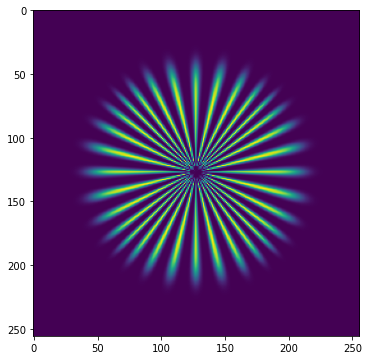

In [9]:
from skimage.io import imread
from tnia.plotting.plt_helper import imshow2d

input_name = "D:\\images\\tnia-python-images\\deconvolution\\sinuosidal siemens star\\ref.tif"
star = imread(input_name)
star = star.astype('float32')
fig = imshow2d(star)

(256, 256)


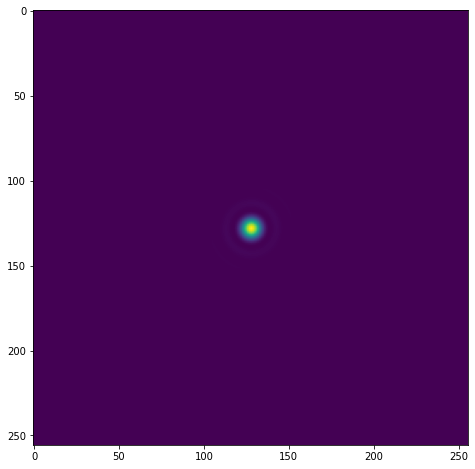

In [10]:
from tnia.deconvolution.psfs import paraxial_psf

n=256
wavelength = 500
na=1.4
pixel_size = 20

psf=paraxial_psf(n, wavelength, na, pixel_size)

print(psf.shape)
fig=imshow2d(psf,8,8)

In [11]:
from tnia.deconvolution.forward import forward

float32 float32 float32
0.99994814 1088.0


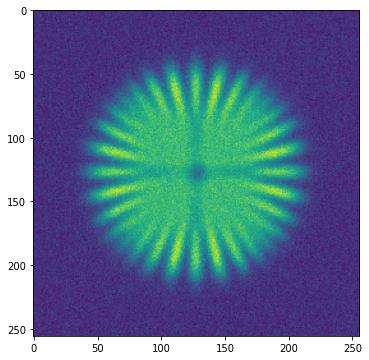

In [12]:
img = forward(star, psf,500.,500., True).astype('float32')
fig = imshow2d(img)
print(star.dtype, img.dtype, psf.dtype)
print(star.max(), img.max())

In [13]:
from skimage.restoration import richardson_lucy

In [14]:
import numpy as np
from numpy.fft import fftn, ifftn, fftshift 

def richardson_lucy_np(image, psf, num_iters):
    
    otf = fftn(fftshift(psf))
    otf_ = np.conjugate(otf)    
    estimate = image# np.ones(image.shape)/image.sum()

    for i in range(num_iters):
        #print(i)
        
        reblurred = ifftn(fftn(estimate) * otf)
        ratio = image / (reblurred + 1e-30)
        estimate = estimate * (ifftn(fftn(ratio) * otf_)).astype(float)
        

    return estimate

In [15]:
from tnia.nd.ndutil import centercrop2d

psf2=centercrop2d(psf,(64,64))
psf2=psf2/psf2.sum()

C:\Users\bnort\AppData\Local\Temp\ipykernel_29048\159700553.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  estimate = estimate * (ifftn(fftn(ratio) * otf_)).astype(float)
C:\Users\bnort\AppData\Local\Temp\ipykernel_29048\1451828095.py:2: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  decon_sk = richardson_lucy(img, psf, iterations=100, clip=False)


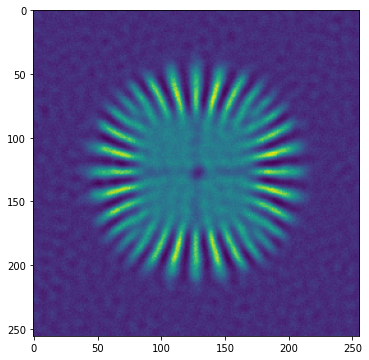

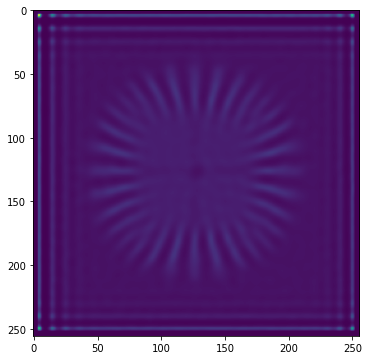

In [18]:
decon_np2 = richardson_lucy_np(img, psf,100)
decon_sk = richardson_lucy(img, psf, iterations=100, clip=False)

#decon100 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 100)
#decon1000 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 1000)
#decon10000 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 10000)

fig = imshow2d(decon_np2)
#fig = imshow2d(decon_np)
fig = imshow2d(decon_sk)

In [ ]:
decon_np = richardson_lucy_np(img, psf,100)
decon_sk = richardson_lucy(img, psf, iterations=100, clip=False)

#decon100 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 100)
#decon1000 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 1000)
#decon10000 = richardson_lucy_np(img.astype('float64'), psf.astype('float64'), 10000)

fig = imshow2d(decon_np)
fig = imshow2d(decon_sk)

In [2]:
help(richardson_lucy)

NameError: name 'richardson_lucy' is not defined

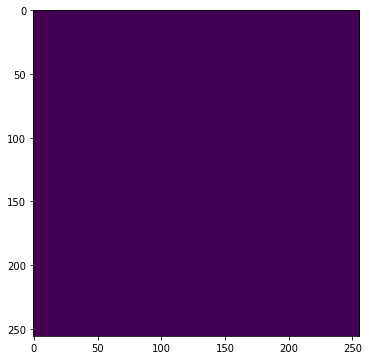

In [53]:
image=img
float_type='float32'
im_deconv = np.full(image.shape, image.mean(), dtype=float_type)
fig = imshow2d(im_deconv)

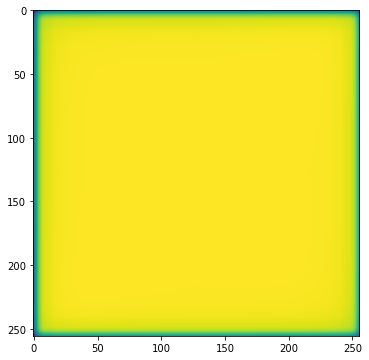

In [54]:
from scipy.signal import convolve
eps=1e-12
conv = convolve(im_deconv, psf, mode='same') + eps
fig=imshow2d(conv)

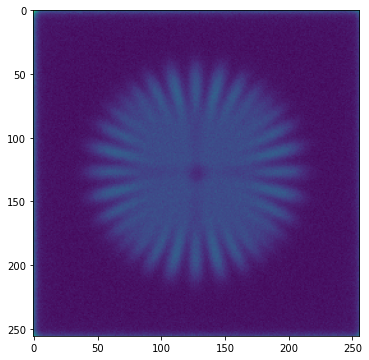

In [55]:
relative_blur = image / conv
fig=imshow2d(relative_blur)

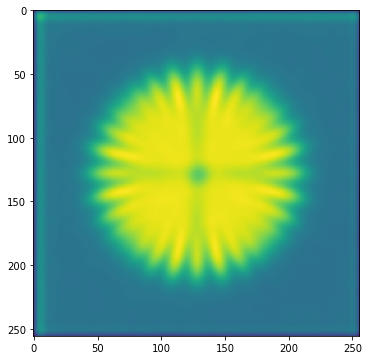

In [56]:
im_deconv *= convolve(relative_blur, psf, mode='same')
fig = imshow2d(im_deconv)

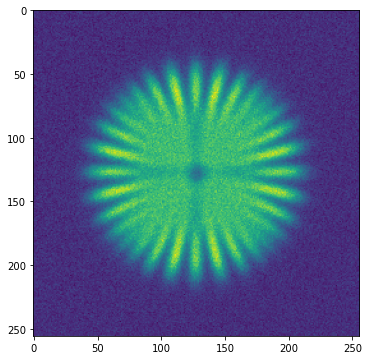

In [57]:
fig=imshow2d(image)